# Trigger Word Detection with a Sequential Model

In [1]:
import urllib.request
import zipfile
import numpy as np
import tensorflow as tf
import IPython
from td_utils import *

In [2]:
url = 'https://firebasestorage.googleapis.com/v0/b/z2tma61d2a74hya815w9x621uszb3a.appspot.com/o/TriggerWordDet_dataset.zip?alt=media&token=d161add8-323d-4f88-93ea-a4c6de42b34a'
local_zip = 'TriggerWordDet_dataset.zip'
urllib.request.urlretrieve(url, local_zip)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
X_train = np.load("X_train.npy")
Y_train = np.load("Y_train.npy")

X_test = np.load("X_test.npy")
Y_test = np.load("Y_test.npy")

In [4]:
def Model(params):
    dims = params['dims']
    X_train = params['X_train']
    Y_train = params['Y_train']
    epochs = params['epochs']
    learning_rate = params['learning_rate']
    batch_size = params['batch_size']
    dropout_rate = params['dropout_rate']
    f1 = tf.keras.layers.Conv1D(filters=256, 
                                kernel_size=15, 
                                strides=4,
                                padding='valid',
                                activation='linear',
                                kernel_initializer='glorot_uniform',
                                bias_initializer='zeros')
    f2 = tf.keras.layers.BatchNormalization(axis=-1)
    f3 = tf.keras.layers.Activation(activation='relu')
    f4 = tf.keras.layers.Dropout(rate=dropout_rate)
    f5 = tf.keras.layers.GRU(units=128, 
                             activation='tanh', 
                             recurrent_activation='hard_sigmoid',
                             kernel_initializer='glorot_uniform',
                             recurrent_initializer='zeros',
                             bias_initializer='zeros', 
                             return_sequences=True, 
                             return_state=False,
                             reset_after=False)
    f6 = tf.keras.layers.Dropout(rate=dropout_rate)
    f7 = tf.keras.layers.BatchNormalization(axis=-1)
    f8 = tf.keras.layers.GRU(units=128, 
                             activation='tanh', 
                             recurrent_activation='hard_sigmoid',
                             kernel_initializer='glorot_uniform',
                             recurrent_initializer='zeros',
                             bias_initializer='zeros', 
                             return_sequences=True, 
                             return_state=False,
                             reset_after=False)
    f9 = tf.keras.layers.Dropout(rate=dropout_rate)
    f10 = tf.keras.layers.BatchNormalization(axis=-1)
    f11 = tf.keras.layers.Dropout(rate=dropout_rate)    
    f12 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=dims[1][1],
                                                                activation='sigmoid',
                                                                kernel_initializer='glorot_uniform',
                                                                bias_initializer='zeros'))
    x = tf.keras.Input(shape=dims[0])
    a1 = f1(x)
    a2 = f2(a1)
    a3 = f3(a2)
    a4 = f4(a3)
    a5 = f5(a4)
    a6 = f6(a5)
    a7 = f7(a6)
    a8 = f8(a7)
    a9 = f9(a8)
    a10 = f10(a9)
    a11 = f11(a10)
    y = f12(a11)
    model = tf.keras.Model(x, y)    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, 
                                         beta_1=0.9, 
                                         beta_2=0.999, 
                                         epsilon=1e-07)
    model.compile(loss='binary_crossentropy', metrics=['binary_accuracy'], optimizer=optimizer)
    model.summary()
    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)
    return model

In [5]:
model = Model({'dims': [X_train.shape[1:], Y_train.shape[1:]], 
               'X_train': X_train,
               'Y_train': Y_train,
               'epochs': 2, 
               'learning_rate': 0.01,
               'batch_size': 5,
               'dropout_rate': 0.8})

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5511, 101)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1375, 256)         388096    
_________________________________________________________________
batch_normalization (BatchNo (None, 1375, 256)         1024      
_________________________________________________________________
activation (Activation)      (None, 1375, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1375, 256)         0         
_________________________________________________________________
gru (GRU)                    (None, 1375, 128)         147840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1375, 128)         0     

In [6]:
model.evaluate(X_train, Y_train)

26/26 [==============================] - 1s 39ms/sample - loss: 0.3800 - binary_accuracy: 0.9649


[0.37997350096702576, 0.9648671]

In [7]:
model.evaluate(X_test, Y_test)

25/25 [==============================] - 1s 29ms/sample - loss: 0.4266 - binary_accuracy: 0.9313


[0.426606148481369, 0.9312873]

-----

In [8]:
url = 'https://firebasestorage.googleapis.com/v0/b/z2tma61d2a74hya815w9x621uszb3a.appspot.com/o/TriggerWordDet.h5.zip?alt=media&token=4ab63923-e16c-4dbd-8633-3be298197446'
local_zip = 'TriggerWordDet.h5.zip'
urllib.request.urlretrieve(url, local_zip)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [9]:
model_ = tf.keras.models.load_model('TriggerWordDet.h5') 
model_.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5511, 101)]       0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1375, 256)         388096    
_________________________________________________________________
batch_normalization (BatchNo (None, 1375, 256)         1024      
_________________________________________________________________
activation (Activation)      (None, 1375, 256)         0         
_________________________________________________________________
dropout (Dropout)            (None, 1375, 256)         0         
_________________________________________________________________
gru (GRU)                    (None, 1375, 128)         147840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1375, 128)         0     

In [10]:
model_.evaluate(X_train, Y_train)

26/26 [==============================] - 1s 36ms/sample - loss: 0.0732 - binary_accuracy: 0.9711


[0.07322192192077637, 0.9711049]

In [11]:
model_.evaluate(X_test, Y_test)

25/25 [==============================] - 1s 21ms/sample - loss: 0.3574 - binary_accuracy: 0.9503


[0.35744813084602356, 0.95025456]

In [12]:
filename1 = '1.wav'
IPython.display.Audio(filename1)

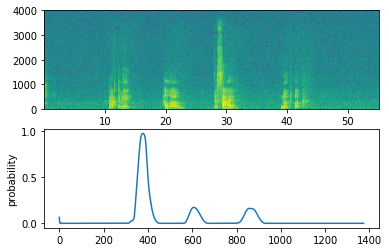

array([[[6.4871237e-02],
        [2.8498761e-02],
        [7.5636674e-03],
        ...,
        [6.6812085e-05],
        [6.6812085e-05],
        [6.6812085e-05]]], dtype=float32)

In [13]:
detect_triggerword(model_, filename1)

In [14]:
filename2 = '2.wav'
IPython.display.Audio(filename2)

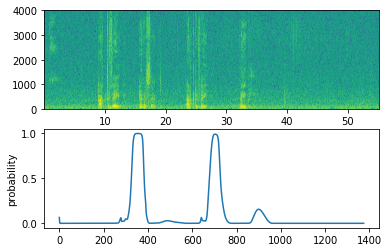

array([[[6.4852670e-02],
        [2.8488519e-02],
        [7.5683002e-03],
        ...,
        [6.7049325e-05],
        [6.7050991e-05],
        [6.7051442e-05]]], dtype=float32)

In [15]:
detect_triggerword(model_, filename2)

In [16]:
my_audio = 'my_audio.wav'
preprocess_audio(my_audio)
IPython.display.Audio(my_audio)

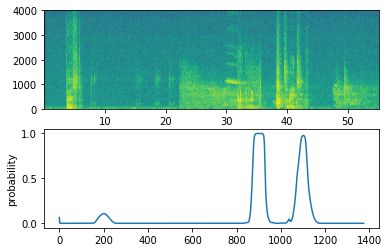

array([[[6.4752467e-02],
        [2.8397866e-02],
        [7.5370474e-03],
        ...,
        [6.6636661e-05],
        [6.6636851e-05],
        [6.6636851e-05]]], dtype=float32)

In [17]:
detect_triggerword(model_, my_audio)